In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# 1. Data Reading & Understanding 

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# 2. Check for Dtypes

In [3]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_unique}).T

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
Dtypes,object,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object
N_Uniq,70,1741,10,26,566,3113,6,2,5,5,511,207,115,60,4525,44,77,1


# 3. Null Values

In [4]:
pd.DataFrame(df.isnull().sum()).T

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 4. Duplicates

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

0
0


# 5. Outliers

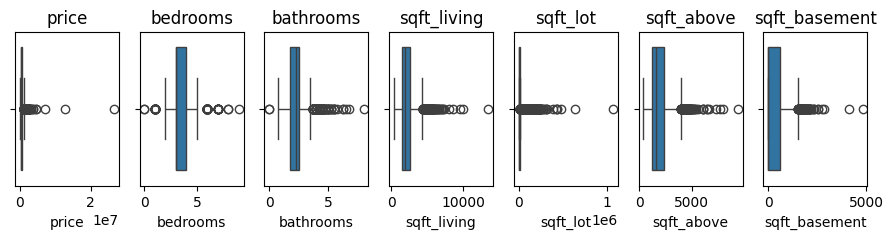

In [6]:
num_cols = ['price', 'bedrooms', 'bathrooms' ,'sqft_living','sqft_lot','sqft_above','sqft_basement']
plt.figure(figsize=(11, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 7, i+1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient="h")
plt.show()

In [7]:
cols = ['price', 'sqft_living', 'sqft_lot']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    before = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = df.shape[0]

    print(f"{col}: removed {before - after} rows")

print("New data shape:", df.shape)

price: removed 240 rows
sqft_living: removed 76 rows
sqft_lot: removed 486 rows
New data shape: (3798, 18)


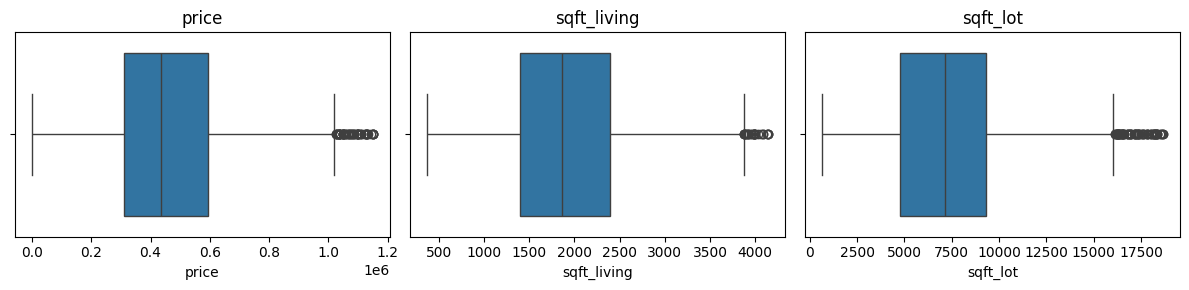

In [8]:
cols = ['price', 'sqft_living', 'sqft_lot']

plt.figure(figsize=(12, 3))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)   
    plt.title(col)
    sns.boxplot(x=df[col], orient="h")

plt.tight_layout()
plt.show()

# 6- Data Type Conversion

In [9]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

df['date'] = pd.to_datetime(df['date'])

df = df.drop(['country', 'street'], axis=1)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['city'] = le.fit_transform(df['city'])
df['statezip'] = le.fit_transform(df['statezip'])
pd.DataFrame(df.dtypes).T

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,datetime64[ns],float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


# 7-Feature Selection/Extraction

In [11]:
corr = df.corr()
corr['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.580575
sqft_above       0.470107
bathrooms        0.364378
bedrooms         0.265609
sqft_basement    0.229886
floors           0.217262
view             0.207895
city             0.119064
condition        0.055797
waterfront       0.039140
yr_built         0.020488
date             0.009302
sqft_lot        -0.004268
statezip        -0.011057
yr_renovated    -0.067516
Name: price, dtype: float64

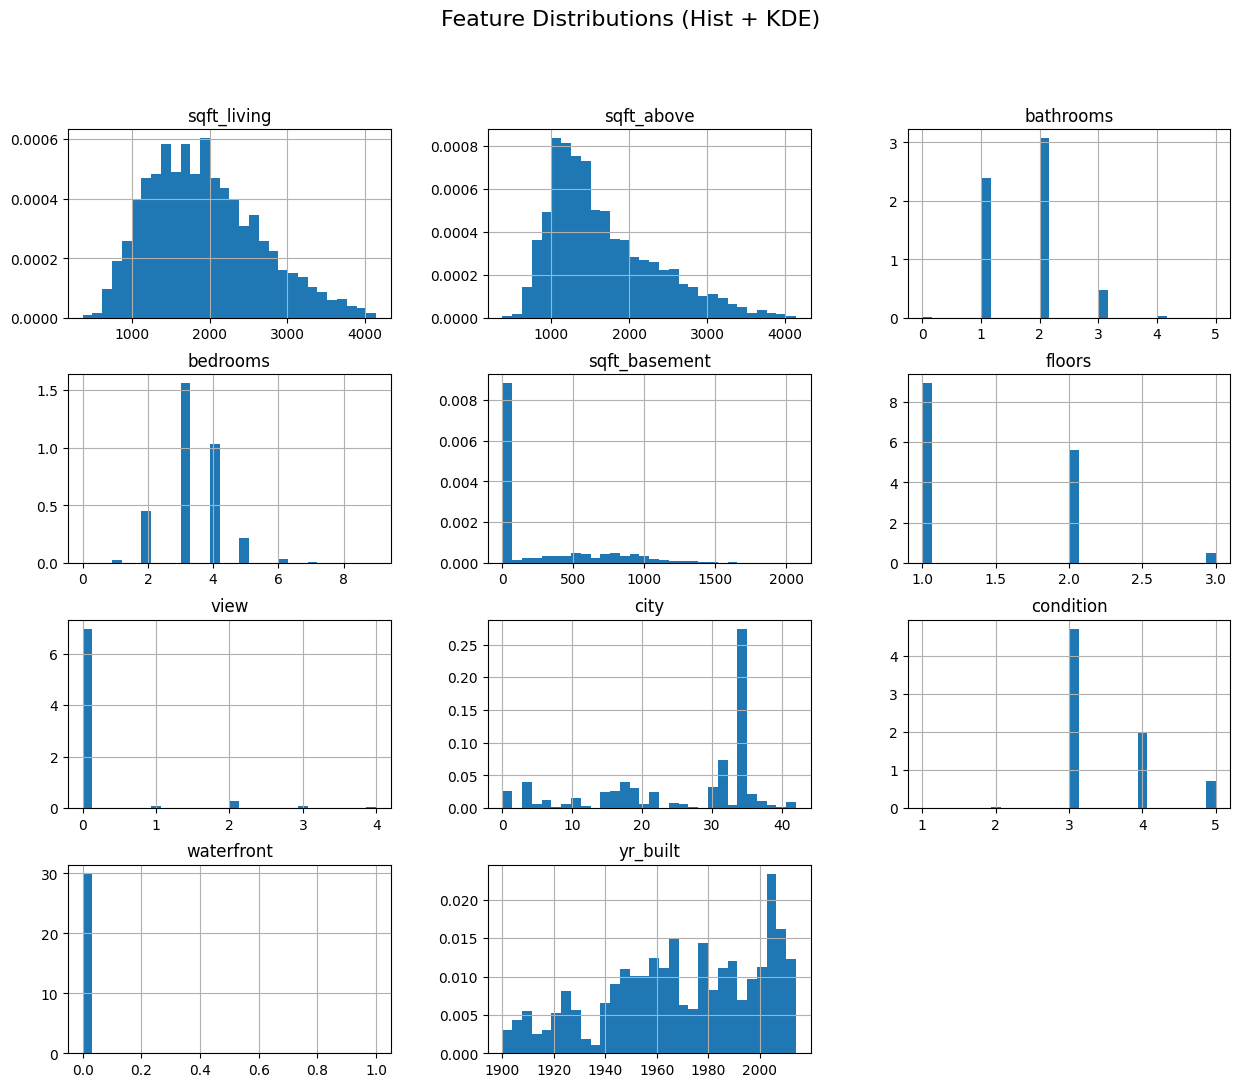

In [12]:
import matplotlib.pyplot as plt


features = ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms',
            'sqft_basement', 'floors', 'view', 'city',
            'condition', 'waterfront', 'yr_built']


df[features].hist(bins=30, figsize=(15, 12), density=True)
plt.suptitle("Feature Distributions (Hist + KDE)", fontsize=16)
plt.show()

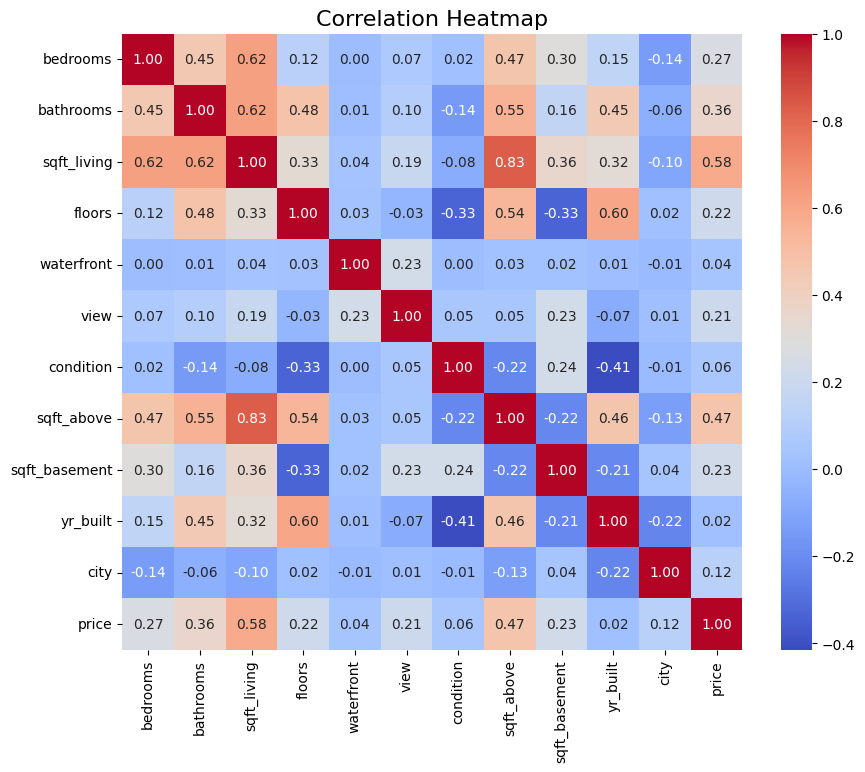

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [13]:
df = df.drop(['sqft_lot', 'date', 'statezip', 'yr_renovated'], axis=1)
print("data after droping:", df.shape)
print("Final data shape:", df.columns.tolist())

data after droping: (3798, 12)
Final data shape: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'city']


# 8-Split Features & Target

In [14]:
X = df.drop('price', axis=1)  # Features
y = df['price']               # Target

# 9- Encoding city

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['city'] = le.fit_transform(X['city'])

# 10- Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
X_scaled.to_csv("features.csv", index=False)
y.to_csv("target.csv", index=False)

In [18]:
df = pd.read_csv("features.csv" )
df.head(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city
0,-0.367351,-1.057187,-0.833261,-0.786369,-0.039778,-0.253753,-0.670496,-0.465458,-0.683069,-0.490665,0.849629
1,-0.367351,0.483563,-0.003645,-0.786369,-0.039778,-0.253753,0.814369,0.400965,-0.683069,-0.128492,-0.665929
2,-0.367351,0.483563,0.094784,-0.786369,-0.039778,-0.253753,0.814369,-0.964753,1.795109,-0.227266,-2.003186
3,0.771587,0.483563,0.010416,-0.786369,-0.039778,-0.253753,0.814369,-0.759161,1.299474,0.200757,0.403876
4,-1.506289,-1.057187,-1.480081,-0.786369,-0.039778,-0.253753,-0.670496,-1.140974,-0.683069,-1.050387,0.760478


In [19]:
df = pd.read_csv("target.csv" )
df.head(5)

,price
0,313000.0
1,342000.0
2,420000.0
3,550000.0
4,490000.0


In [20]:
import pandas as pd


X = pd.read_csv("features.csv")
y = pd.read_csv("target.csv")

df = X.copy()
df['price'] = y

price            1.000000
sqft_living      0.580575
sqft_above       0.470107
bathrooms        0.364378
bedrooms         0.265609
sqft_basement    0.229886
floors           0.217262
view             0.207895
city             0.119064
condition        0.055797
waterfront       0.039140
yr_built         0.020488
Name: price, dtype: float64


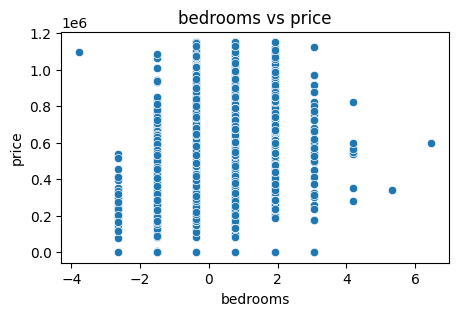

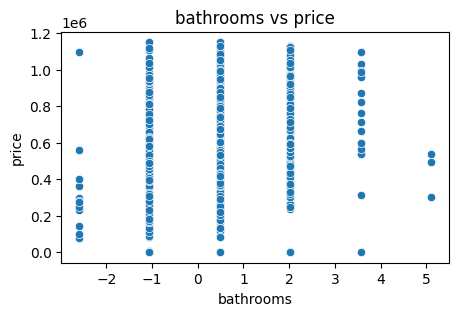

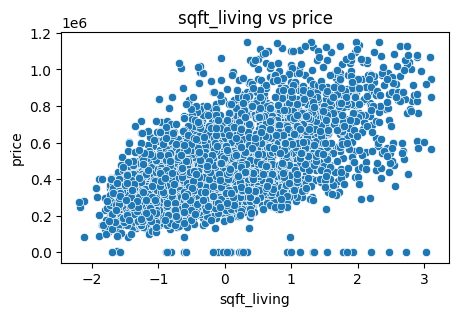

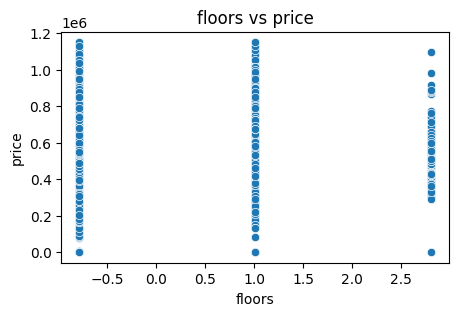

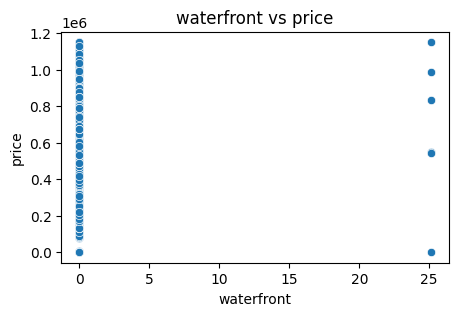

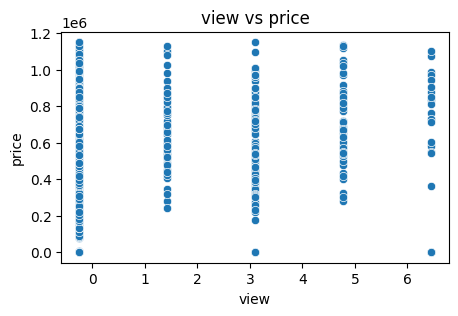

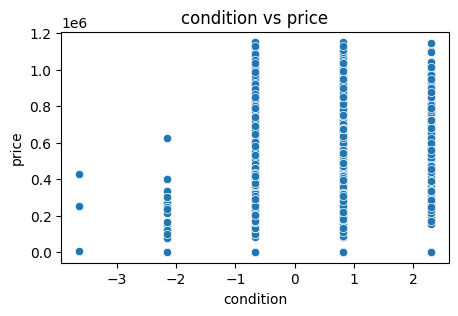

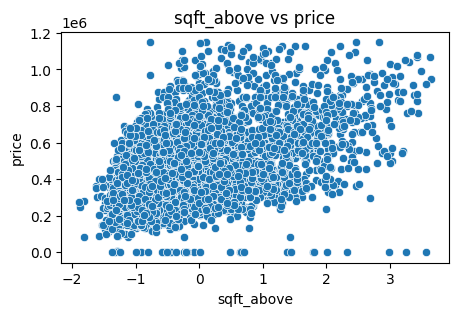

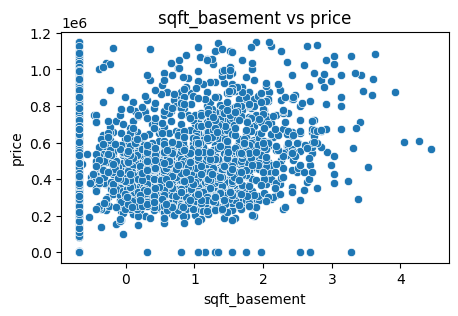

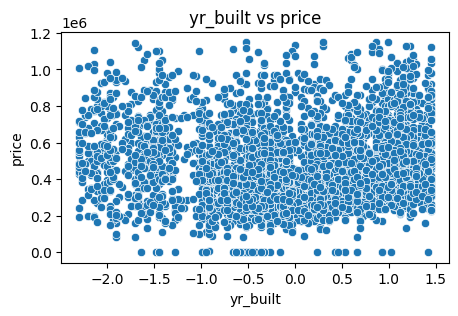

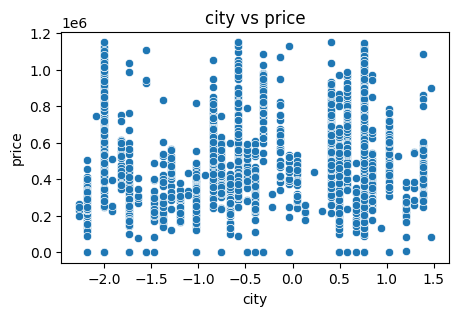

In [21]:
# Correlation
correlations = df.corr()['price'].sort_values(ascending=False)
print(correlations)

# Scatter plots
features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors',
    'waterfront', 'view', 'condition',
    'sqft_above', 'sqft_basement',
    'yr_built', 'city'
]

import matplotlib.pyplot as plt
import seaborn as sns

for col in features:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f"{col} vs price")
    plt.show()